In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import hdbscan
import seaborn as sns
import umap

In [3]:
with open("/yappy/data.pkl", "rb") as f: # e5 embeddings
    data_load = pickle.load(f)

In [ ]:
vec = data_load["embeddings"][150000:200000]
text = data_load["description"][150000:200000]
link = data_load["link"][150000:200000]

In [6]:
reducer = umap.UMAP(n_neighbors=20, min_dist=0, metric='cosine', verbose=True, n_components=3, random_state=42)
red = reducer.fit(vec)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0, n_neighbors=20, random_state=42, verbose=True)
Wed Jun  5 22:59:51 2024 Construct fuzzy simplicial set
Wed Jun  5 22:59:51 2024 Finding Nearest Neighbors
Wed Jun  5 22:59:51 2024 Building RP forest with 16 trees
Wed Jun  5 22:59:54 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
	Stopping threshold met -- exiting after 6 iterations
Wed Jun  5 23:00:01 2024 Finished Nearest Neighbor Search
Wed Jun  5 23:00:03 2024 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:59]


Wed Jun  5 23:02:26 2024 Finished embedding


In [12]:
embedding = red.transform(vec)
hd = hdbscan.HDBSCAN(min_cluster_size=500, cluster_selection_epsilon=0.1, core_dist_n_jobs=1)
clusters = hd.fit_predict(embedding)

In [13]:
len(set(hd.labels_))

20

In [14]:
color_palette = sns.color_palette('deep', len(set(hd.labels_)))
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in hd.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hd.probabilities_)]

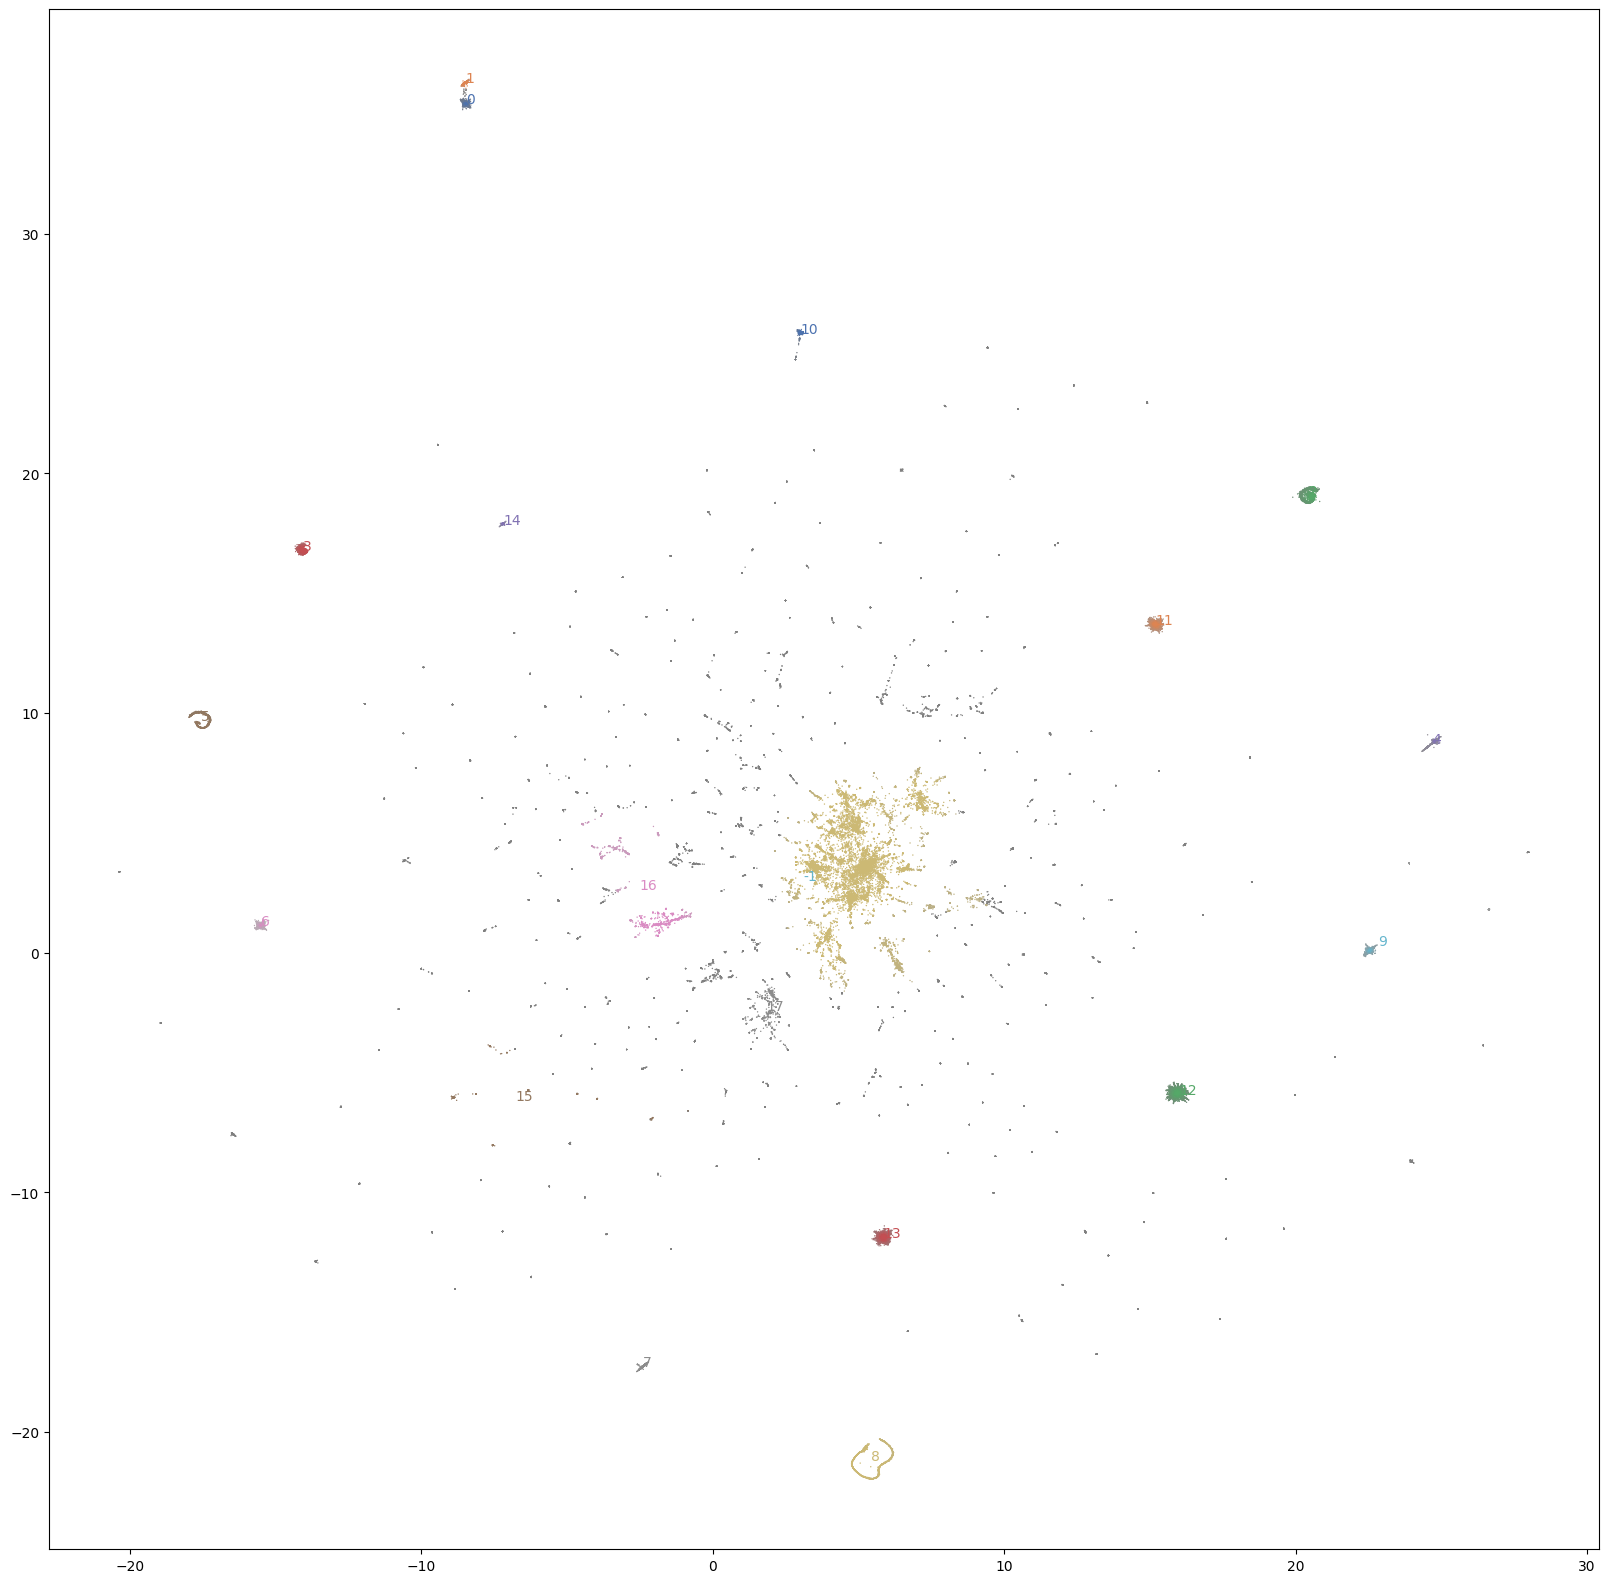

In [15]:
figure(figsize=(20, 20), dpi=100)
plt.scatter(*embedding.T, s=1, linewidth=0, c=cluster_member_colors, alpha=1)

color_palette = sns.color_palette('deep', len(set(hd.labels_)))

unique_labels = set(hd.labels_)
for label, color in zip(unique_labels, color_palette):
    indices = [i for i, l in enumerate(hd.labels_) if l == label]
    plt.text(embedding[indices, 0].mean(), embedding[indices, 1].mean(), str(label), color=color)

plt.show()

In [16]:
data = pd.DataFrame({'text':text, 'cluster':clusters, 'link':link})
data = data.sort_values("cluster", ascending=False)

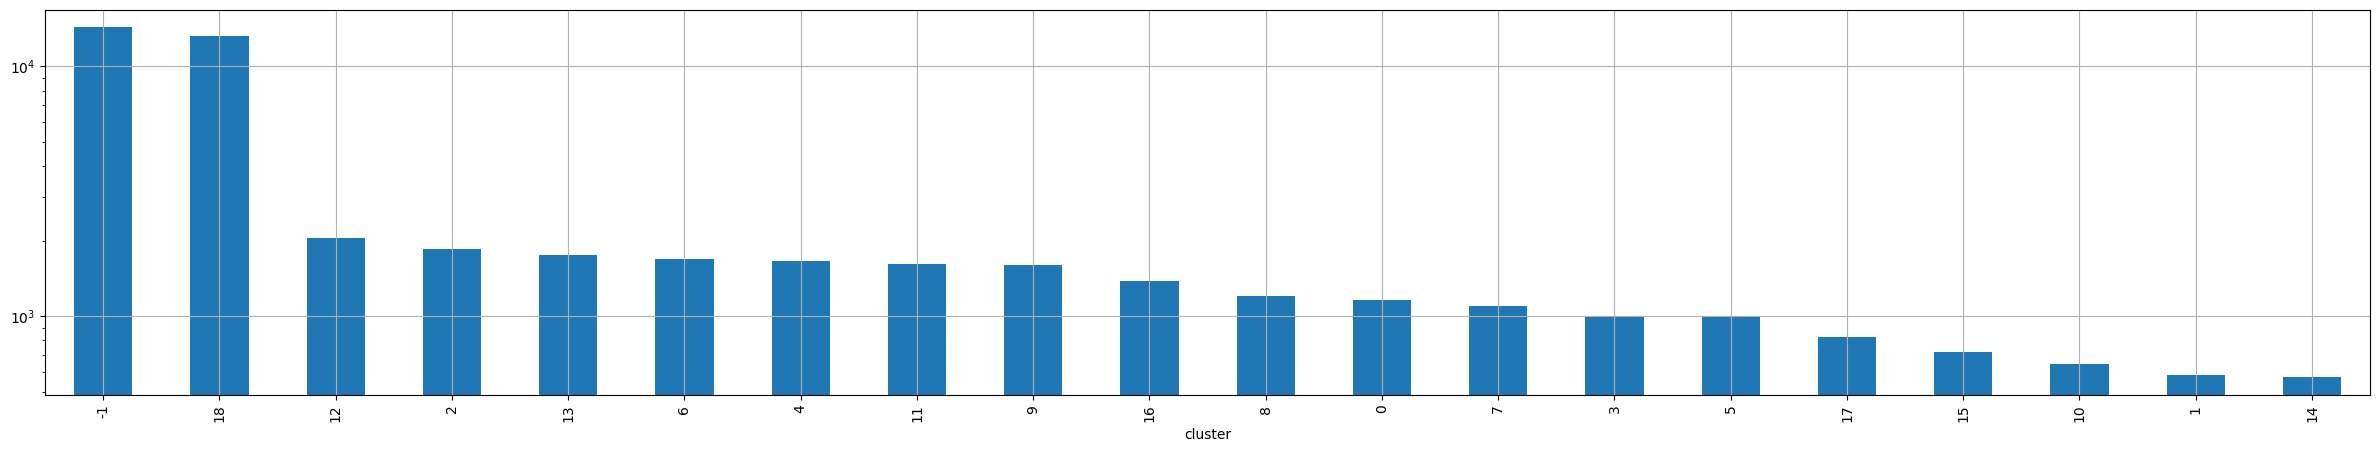

In [17]:
data.cluster.value_counts().plot(kind='bar', figsize=(30,5))
plt.yscale('log')
plt.grid(True)
plt.show()

In [18]:
data[data.cluster==16]

,text,cluster,link
12941,авто auto vehicle студия722 мойка,16,https://cdn-st.rutubelist.ru/media/0d/e7/05946...
15618,технология девайс technologies телефон лайфхак...,16,https://cdn-st.rutubelist.ru/media/60/d8/568ad...
28369,авто auto vehicle автомастерская porsche,16,https://cdn-st.rutubelist.ru/media/3a/33/fddac...
8390,технология девайс technologies техника обзорде...,16,https://cdn-st.rutubelist.ru/media/6b/05/bf5c3...
25512,технология девайс technologies техника обзорде...,16,https://cdn-st.rutubelist.ru/media/90/90/9bd4d...
...,...,...,...
1366,наука научный научпоп учимсявместо математик,16,https://cdn-st.rutubelist.ru/media/1a/b1/303c6...
31128,авто auto восстановление оклейка полировка,16,https://cdn-st.rutubelist.ru/media/9e/7b/367d5...
24786,авто auto vehicle восстановление тюнинг,16,https://cdn-st.rutubelist.ru/media/d0/2d/ad3de...
48952,технология девайс technologies длякухня,16,https://cdn-st.rutubelist.ru/media/81/33/384cf...
